In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21597, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df=df.drop(['id','date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1)

In [8]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


In [9]:
df.isna().sum()
#waterfront has 2376 Null values

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [10]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [11]:
df.waterfront.fillna(0, inplace=True)

In [12]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004


In [13]:
feat=list(df.columns)
feat

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'yr_built']

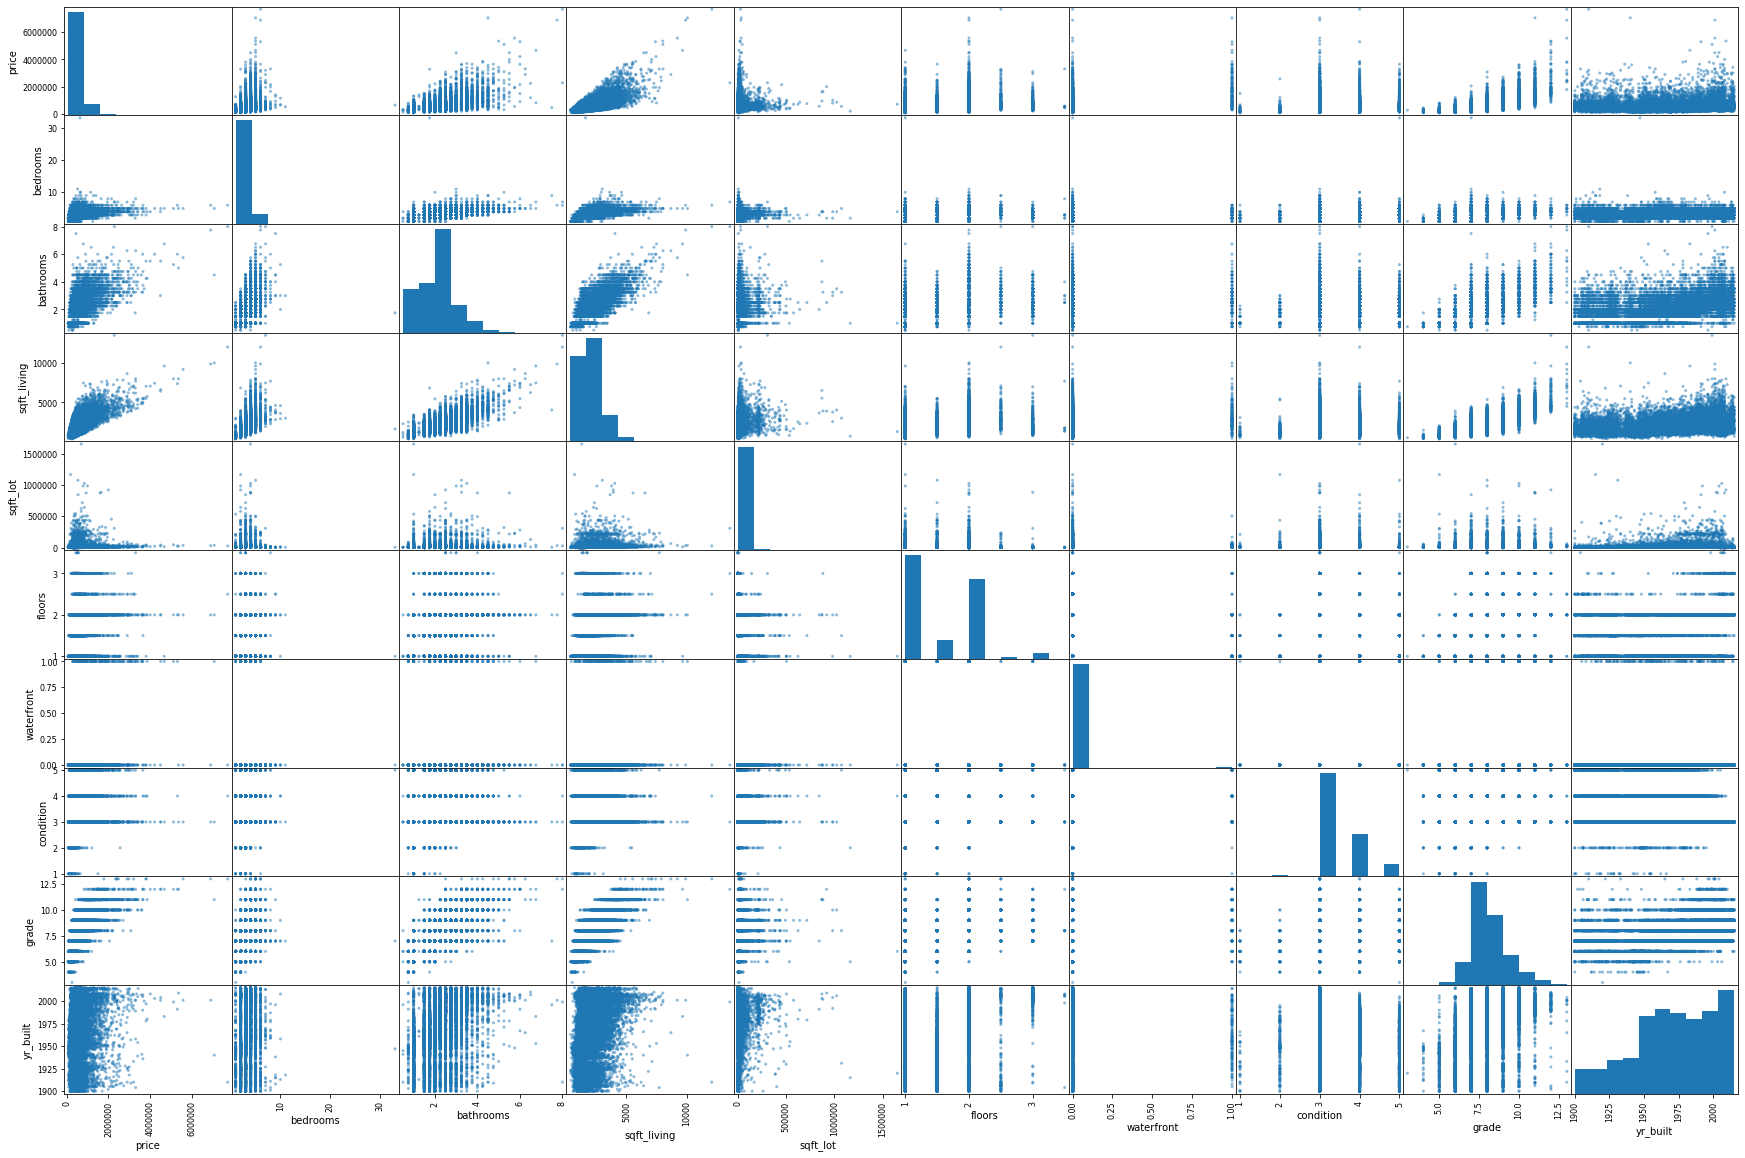

In [14]:
pd.plotting.scatter_matrix(df, figsize=(30,20))
plt.show()

In [15]:
#bedrooms has a positive correlation with price, but they are outliers
#bathrooms has a moderately strong correlation with price, Bathrooms itselfs looks skew on the right, can improve later with log-transformation
#sqft_living has a strong relationship with price
#floors, waterfront, condition are categorical variables, make them dummies later.
#grade is also a categorical variable but has a relationship with price. 
#yr_built does not have any ralation with price

In [16]:
#check collinearity
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


In [17]:
coral = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

coral['pairs'] = list(zip(coral.level_0, coral.level_1))

coral.set_index(['pairs'], inplace = True)

coral.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
coral.columns = ['cc']

coral.drop_duplicates(inplace=True)
#only take the value from .75 to 1
coral[(coral.cc>.75) & (coral.cc<1)]

,cc
pairs,
"(sqft_living, grade)",0.762779
"(bathrooms, sqft_living)",0.755758


In [18]:
#We have 2 pairs of independend variables have strong relationshiip, it could lead to multicolinearity. 
#we need to drop 1 in a pair

In [51]:
#make it dummies
flo_dummies=pd.get_dummies(df.floors,prefix='flo' ,drop_first=True)

con_dummies=pd.get_dummies(df.condition,prefix='con' ,drop_first=True)
gra_dummies=pd.get_dummies(df.grade,prefix='gra' ,drop_first=True)


In [22]:
df.shape

(21597, 10)

In [28]:
df2=df.drop(['floors','condition','grade'],axis=1)

In [35]:
df3=pd.concat([df2,flo_dummies,con_dummies,gra_dummies], axis=1)

In [36]:
df3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,yr_built,flo_1.5,flo_2.0,flo_2.5,...,gra_4,gra_5,gra_6,gra_7,gra_8,gra_9,gra_10,gra_11,gra_12,gra_13
0,221900.0,3,1.00,1180,5650,0.0,1955,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,0.0,1951,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,0.0,1933,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,0.0,1965,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,0.0,1987,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,0.0,2009,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21593,400000.0,4,2.50,2310,5813,0.0,2014,0,1,0,...,0,0,0,0,1,0,0,0,0,0
21594,402101.0,2,0.75,1020,1350,0.0,2009,0,1,0,...,0,0,0,1,0,0,0,0,0,0
21595,400000.0,3,2.50,1600,2388,0.0,2004,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [45]:
# Defining the problem
outcome = 'price'
x_cols = list(df3.columns)
x_cols.remove(outcome)

In [71]:
train, test = train_test_split(df3)

In [72]:
print(len(train), len(test))
train.head()

16197 5400


,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,yr_built,flo_1_5,flo_2_0,flo_2_5,...,gra_4,gra_5,gra_6,gra_7,gra_8,gra_9,gra_10,gra_11,gra_12,gra_13
12633,458500.0,3,1.50,1280,1920,0.0,1905,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1008,280300.0,2,1.00,920,5000,0.0,1949,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6296,475000.0,3,1.75,1320,7840,0.0,1966,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11275,312000.0,3,2.25,1540,5338,0.0,1954,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10049,652500.0,4,2.50,2540,38677,0.0,1987,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
list(x_cols)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'yr_built',
 'flo_1.5',
 'flo_2.0',
 'flo_2.5',
 'flo_3.0',
 'flo_3.5',
 'con_2',
 'con_3',
 'con_4',
 'con_5',
 'gra_4',
 'gra_5',
 'gra_6',
 'gra_7',
 'gra_8',
 'gra_9',
 'gra_10',
 'gra_11',
 'gra_12',
 'gra_13']

In [62]:
sub=[('.','_')]
def replace(x):
    for old, new in sub:
        x=x.replace(old,new)
    return x

In [69]:
df3.columns=[replace(x) for x in df3.columns]

In [64]:
x_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'yr_built',
 'flo_1_5',
 'flo_2_0',
 'flo_2_5',
 'flo_3_0',
 'flo_3_5',
 'con_2',
 'con_3',
 'con_4',
 'con_5',
 'gra_4',
 'gra_5',
 'gra_6',
 'gra_7',
 'gra_8',
 'gra_9',
 'gra_10',
 'gra_11',
 'gra_12',
 'gra_13']

In [70]:
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'yr_built', 'flo_1_5', 'flo_2_0', 'flo_2_5', 'flo_3_0',
       'flo_3_5', 'con_2', 'con_3', 'con_4', 'con_5', 'gra_4', 'gra_5',
       'gra_6', 'gra_7', 'gra_8', 'gra_9', 'gra_10', 'gra_11', 'gra_12',
       'gra_13'],
      dtype='object')

In [73]:

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.229e+32
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:26:38   Log-Likelihood:             3.1579e+05
No. Observations:               16197   AIC:                        -6.315e+05
Df Residuals:                   16170   BIC:                        -6.313e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.193e-09   1.07e-09     -1.119      0.263   -3.28e-09    8.98e-10
price           1.0000   3.08e-17   3.25e+16      0.000       1.000       1.000
bedrooms     1.012e-11   9.11e-12      1.111      0.266   -7.73e-12     2.8e-11
bathrooms    5.457e-11   1.54e-11      3.542      0.000    2.44e-11    8.48e-11
sqft_living  -4.53e-14   1.57e-14     -2.883      0.004   -7.61e-14   -1.45e-14
sqft_lot     2.359e-16   1.73e-16      1.362      0.173   -1.04e-16    5.76e-16
waterfront   -2.11e-10   8.33e-11     -2.534      0.011   -3.74e-10   -4.78e-11
yr_built     4.405e-13   3.42e-13      1.289      0.197   -2.29e-13    1.11e-12
flo_1_5     -6.548e-11    2.5e-11     -2.619      0.009   -1.14e-10   -1.65e-11
flo_2_0     -9.095e-12   1.85e-11     -0.493      0.622   -4.53e-11    2.71e-11
flo_2_5     -1.164e-10   7.57e-11     -1.538      0.124   -2.65e-10    3.19e-11
flo_3_0      -7.64e-11   4.29e-11     -1.781      0.075    -1.6e-10    7.69e-12
flo_3_5      1.892e-09    3.7e-10      5.110      0.000    1.17e-09    2.62e-09
con_2        4.729e-11   1.77e-10      0.267      0.790      -3e-10    3.95e-10
con_3       -6.548e-11   1.63e-10     -0.401      0.689   -3.86e-10    2.55e-10
con_4        3.274e-11   1.64e-10      0.200      0.841   -2.88e-10    3.53e-10
con_5       -5.457e-11   1.65e-10     -0.331      0.740   -3.77e-10    2.68e-10
gra_4       -3.783e-10   8.46e-10     -0.447      0.655   -2.04e-09    1.28e-09
gra_5        1.164e-10   8.28e-10      0.141      0.888   -1.51e-09    1.74e-09
gra_6       -5.821e-11   8.26e-10     -0.070      0.944   -1.68e-09    1.56e-09
gra_7        5.821e-11   8.26e-10      0.070      0.944   -1.56e-09    1.68e-09
gra_8         2.91e-11   8.26e-10      0.035      0.972   -1.59e-09    1.65e-09
gra_9        8.731e-11   8.27e-10      0.106      0.916   -1.53e-09    1.71e-09
gra_10       4.366e-10   8.27e-10      0.528      0.598   -1.19e-09    2.06e-09
gra_11      -4.657e-10   8.29e-10     -0.562      0.574   -2.09e-09    1.16e-09
gra_12       2.765e-10   8.35e-10      0.331      0.740   -1.36e-09    1.91e-09
gra_13        2.91e-10   8.72e-10      0.334      0.739   -1.42e-09       2e-09
==============================================================================
Omnibus:                    12601.220   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458834.687
Skew:                          -3.435   Prob(JB):                         0.00
Kurtosis:                      28.153   Cond. No.                     2.78e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+08. This might indicate that there are
strong multicollinearity o